# ML Lab 3 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_LAB_PROG/blob/main/03_calssification_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Note!
Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_LAB_PROG/blob/main/00_cheatsheet.ipynb)

# Task 3.1
_Get mnist data_

```python
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
```
_Train simple model:_
- Inspect dataset
- Train binary Binary Classifier 5 or not 5 with SGDClassifier
- Measure Accuracy Using Cross-Validation

_Type your code below_

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#load data
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
#  check content - data and target is needed
mnist.keys() 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# assign X and y
X, y = mnist.data, mnist.target

In [5]:
# split train test
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=1/7)

In [6]:
# make 5 not-5 label
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [7]:
# train SGD classifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [8]:
# check cross validation accuracy
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9689 , 0.96655, 0.9679 ])

# Task 3.2
_Check model results_
- Check Confusion Matrix
- Get Precision,  Recall and f1 score

_Check Precision/Recall Trade-off_
- Experiment with different threshold values
- Calculate precision-recall curve and make precision-recall plot
- Calculate ROC curve and make ROC curve plot
- Calcuate ROC AUC score

_Type your code below_

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

Just like the cross_val_score() function, cross_val_predict() performs k-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (by “clean” I mean “out-of-sample”: the model makes predictions on data that it never saw during training).

_Check model results_

In [10]:
# perform k-fold prediction
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [11]:
# calculate confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53986,   625],
       [ 1436,  3953]])

In [12]:
# manually compute precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.86347750109218

In [13]:
# use method to compute precision: TP / (FP + TP)
precision_score(y_train_5, y_train_pred)

0.86347750109218

In [14]:
# manually compute the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.7335312673965485

In [15]:
# use method to compute the recall: TP / (FN + TP)
recall_score(y_train_5, y_train_pred)

0.7335312673965485

In [16]:
# manually  compute the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7932176181398616

In [17]:
# use method to compute the f1 score
f1_score(y_train_5, y_train_pred)

0.7932176181398616

_Check Precision/Recall Trade-off_

In [18]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [19]:
# get scores from decision_function
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [20]:
y_scores

array([-17161.84051901,  -7438.80771878, -29816.36643553, ...,
       -20517.27641045,  10891.06923276,  -3295.58784787])

In [21]:
# calculate precisions, recalls for thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

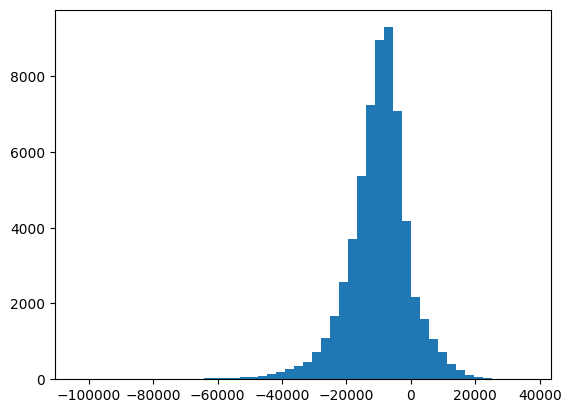

In [22]:
plt.hist(thresholds,  bins=50)
plt.show()

In [23]:
# set a treshold to visualize
threshold = 1000
# get index of first pos ≥ threshold
idx = (thresholds >= threshold).argmax()

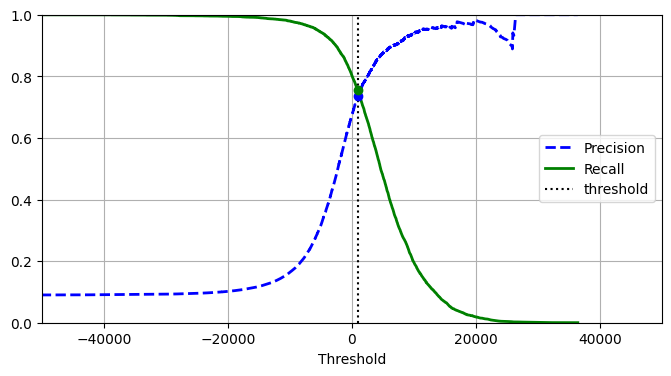

In [24]:
# plot precision, recall vs threshold 
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

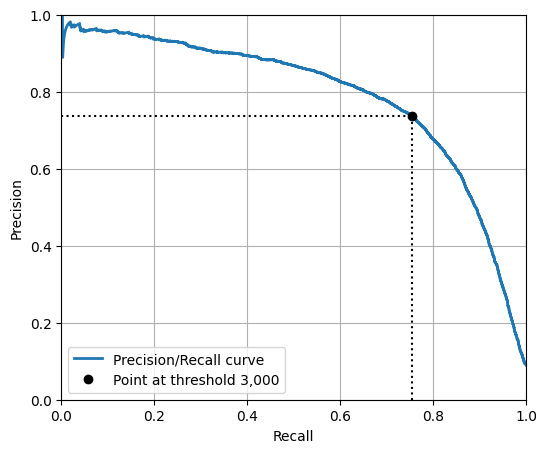

In [25]:
# make precision-recall plot
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [26]:
# what would be treshold for 90% precision?
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision


6561.718746597279

In [27]:
# transform scores to labels using  90% precision treshold
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
# check precision
precision_score(y_train_5, y_train_pred_90)

0.9

In [28]:
# calculate  fpr, tpr, thresholds 
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

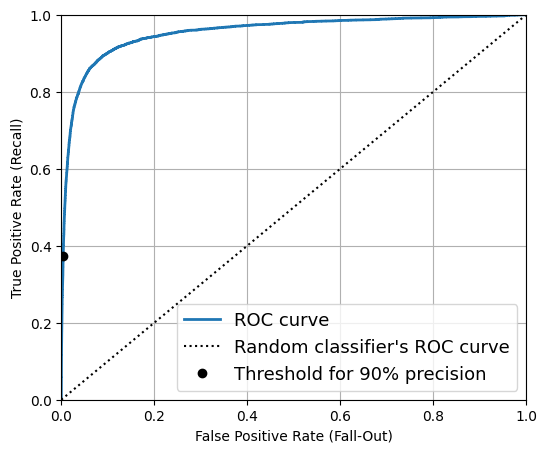

In [29]:
# plot ROC curve
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [30]:
# calc AUC
roc_auc_score(y_train_5, y_scores)

0.9549830531179516

# Task 3.3
_Compare 2 models_
- Train binary Binary Classifier 5 or not 5 with RandomForestClassifier
- Compare results of  RandomForestClassifier with SGDClassifier usign precision-recall curve plot

_Type your code below_

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# predict class probabilities for each data point with RandomForestClassifier
forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [33]:
# check class probabilities
[x for x in zip(y_probas_forest[:10], y_train_5[:10])]

[(array([0.99, 0.01]), False),
 (array([1., 0.]), False),
 (array([0.99, 0.01]), False),
 (array([1., 0.]), False),
 (array([0.99, 0.01]), False),
 (array([0.98, 0.02]), False),
 (array([1., 0.]), False),
 (array([0.87, 0.13]), False),
 (array([0.94, 0.06]), False),
 (array([1., 0.]), False)]

In [34]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

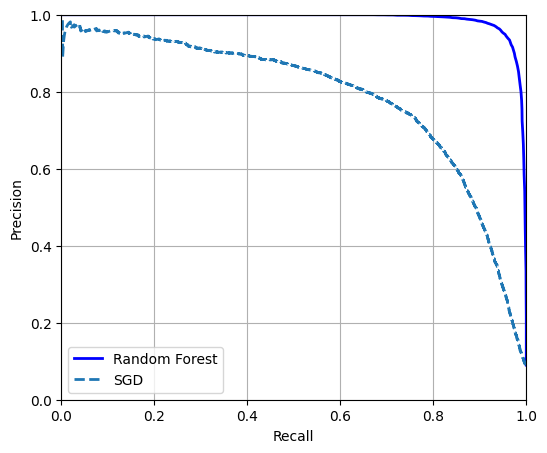

In [35]:
plt.figure(figsize=(6, 5)) 

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

# Task 3.4 
_Perform Multiclass Classification_
- Train binary Multiclass Classifier (0-9) with Support Vector Classifier (SVC)

_Error Analysis_
- display multiclass Confusion Matrix
- display multiclass Confusion Matrix normalized by row

_Type your code below_

In [36]:
from sklearn.svm import SVC

In [37]:
svm_clf = SVC()
svm_clf.fit(X_train[:10000], y_train[:10000]) 

SVC()

In [38]:
some_digit_scores = svm_clf.decision_function(X_test[10:11,:])
some_digit_scores

array([[ 6.13312932, -0.29049783,  8.30009728,  2.74668088,  4.80270698,
         6.00991274,  9.30733381,  0.71107443,  4.97613528,  1.73969505]])

In [39]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [40]:
svm_clf.classes_[some_digit_scores.argmax()]

'6'

In [41]:
cross_val_score(svm_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.92803598, 0.93553223, 0.91741742])

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

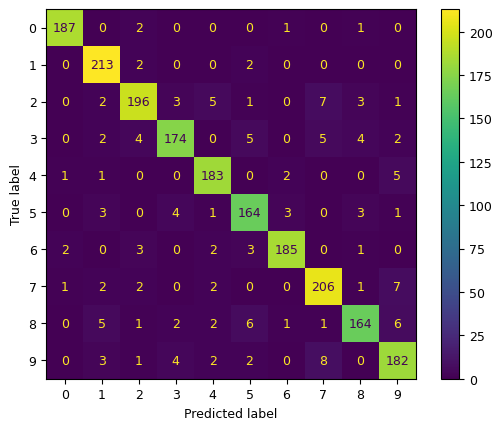

In [43]:
y_train_pred = cross_val_predict(svm_clf, X_train[:2000], y_train[:2000], cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred)
plt.show()

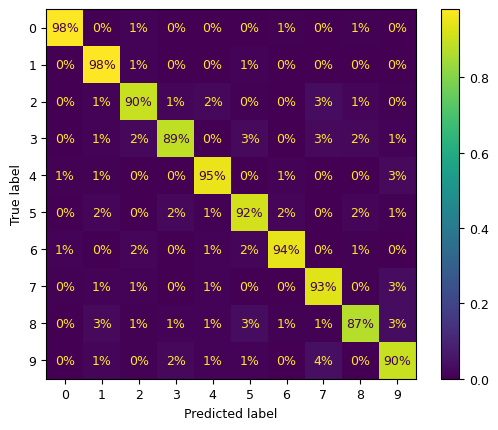

In [44]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, normalize="true", values_format=".0%")
plt.show()

# Task 3.5
 _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

 _Type your code below_

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.973

In [47]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [48]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [49]:
grid_search.best_score_

0.9490999999999999

In [50]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9745

# Task 3.6
_Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._


_Type your code below_

In [51]:
from scipy.ndimage import shift
import numpy as np

In [52]:
# functin for shifting image

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

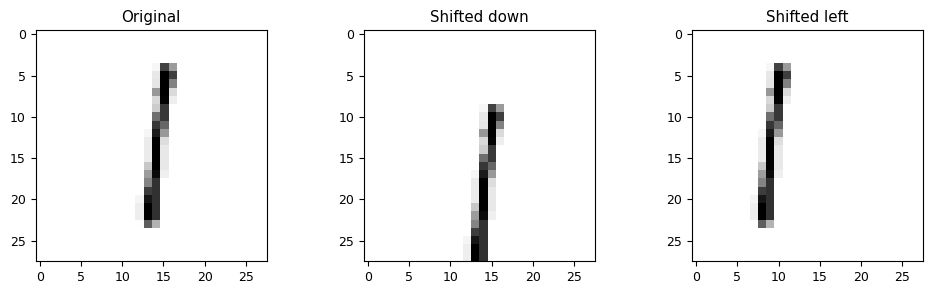

In [53]:
# test 
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [54]:
# create an augmented training set by shifting every image left, right, up and down by one pixel
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [55]:
# shuffle the augmented training set, or else all shifted images will be grouped together
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [56]:
# train the model using the best hyperparameters we found in the previous exercise
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [57]:
# new score
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9802

In [58]:
#check if  error rate dropped
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")

error_rate_change = -22%
